In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
from torch.utils.data import TensorDataset, DataLoader
import warnings
import seaborn as sns 

warnings.filterwarnings('ignore')

/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_36212/3543623438.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train = pd.read_csv('data/Train_Dataset.csv')
test = pd.read_csv('data/Test_Dataset.csv')

In [3]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [4]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


In [7]:
continous = [c for c in train.columns if len(train[c].unique()) >= 5 and c not in ['target', 'Id']]

discret = [c for c in train.columns if c not in continous and c not in ['target', 'Id']]

In [8]:
continous, discret

(['Age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'],
 ['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

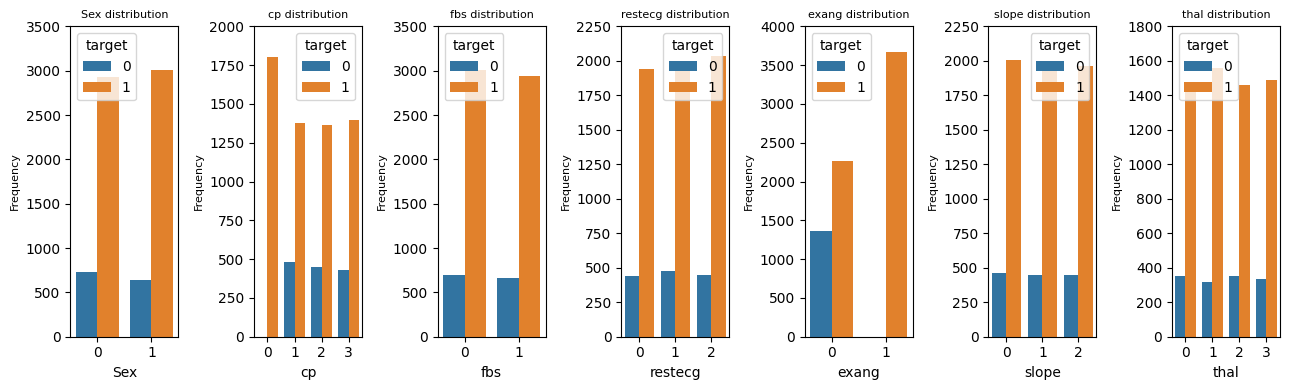

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=len(discret), figsize = (13, 4))
for i, col in enumerate(discret): 
    sns.countplot(x = col, data=train, hue = 'target', ax=ax[i])
    ax[i].set_yticks(ax[i].get_yticks())
    ax[i].tick_params(axis='y', labelsize=10)
    ax[i].set_title(f'{col} distribution', fontsize = 8) 
    ax[i].set_ylabel('Frequency', fontsize = 8)
plt.tight_layout()

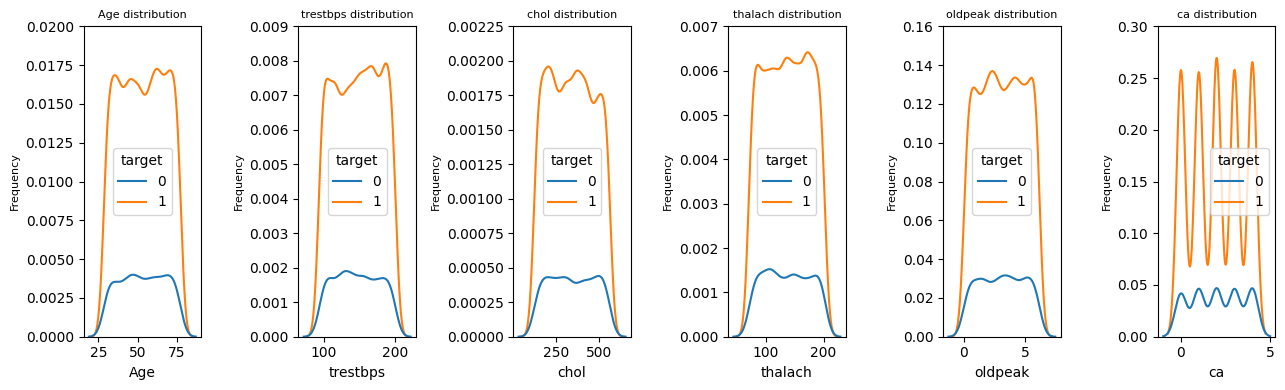

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=len(continous), figsize = (13, 4))
for i, col in enumerate(continous): 
    sns.kdeplot(x = col, data=train, hue = 'target', ax=ax[i])
    ax[i].set_yticks(ax[i].get_yticks())
    ax[i].tick_params(axis='y', labelsize=10)
    ax[i].set_title(f'{col} distribution', fontsize = 8) 
    ax[i].set_ylabel('Frequency', fontsize = 8)
plt.tight_layout()

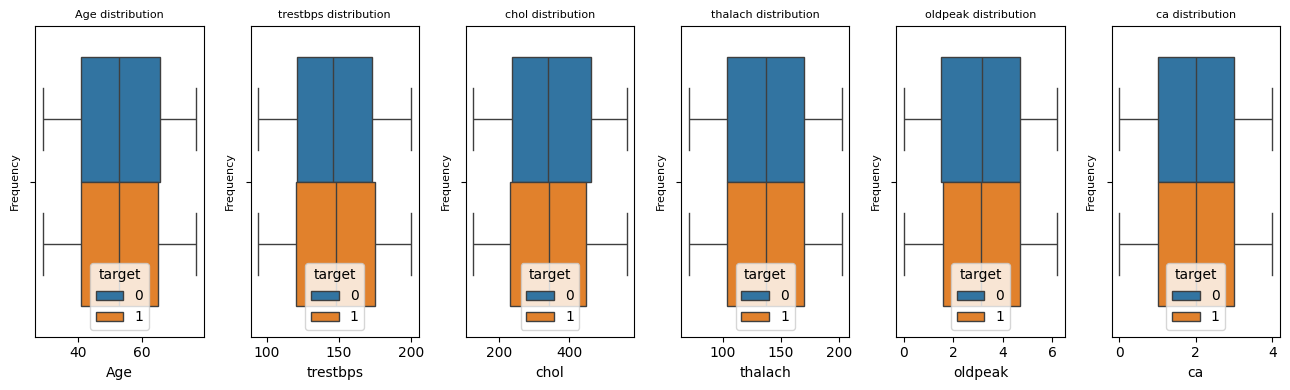

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=len(continous), figsize = (13, 4))
for i, col in enumerate(continous): 
    sns.boxplot(x = col, data=train, hue = 'target', ax=ax[i])
    ax[i].set_yticks(ax[i].get_yticks())
    ax[i].tick_params(axis='y', labelsize=10)
    ax[i].set_title(f'{col} distribution', fontsize = 8) 
    ax[i].set_ylabel('Frequency', fontsize = 8)
plt.tight_layout()

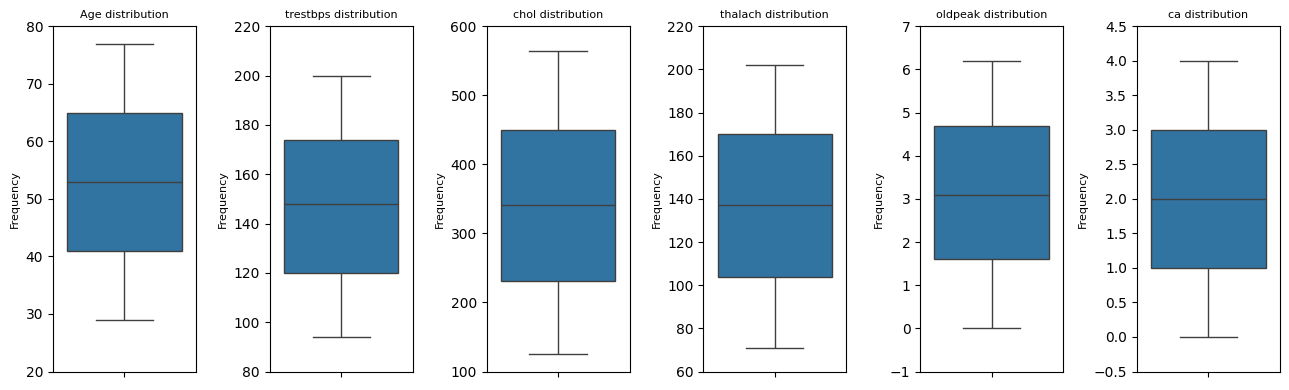

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=len(continous), figsize = (13, 4))
for i, col in enumerate(continous): 
    sns.boxplot(y = col, data=train, ax=ax[i])
    ax[i].set_yticks(ax[i].get_yticks())
    ax[i].tick_params(axis='y', labelsize=10)
    ax[i].set_title(f'{col} distribution', fontsize = 8) 
    ax[i].set_ylabel('Frequency', fontsize = 8)
plt.tight_layout()

<Axes: >

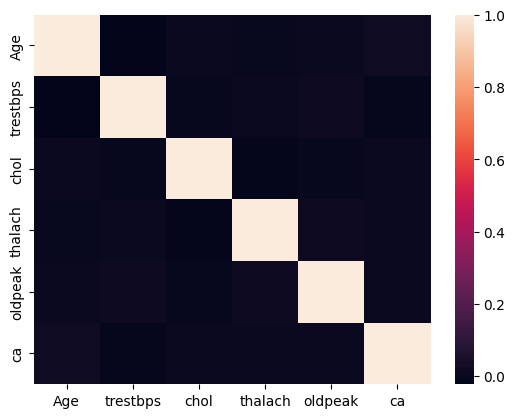

In [13]:
sns.heatmap(data=train[continous].corr())

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
X = train.drop(labels=['Id', 'target'], axis=1 ).values
y = train['target'].values

In [16]:
x_train, x_val, y_train, y_val = train_test_split(X, y, random_state=10, test_size=0.3)

In [17]:
x_train_tensor = torch.tensor(x_train).float()
x_val_tensor = torch.tensor(x_val).float()
y_train_tensor = torch.tensor(y_train).float().unsqueeze(1)
y_val_tensor = torch.tensor(y_val).float().unsqueeze(1)
test_tensor = torch.tensor(test.values).float()

In [18]:
train_tensor = TensorDataset(torch.tensor(X), torch.tensor(y))

In [19]:
sample = train_tensor[0]
feature_sample, target_sample = sample

print(feature_sample, target_sample)

tensor([ 33.0000,   0.0000,   1.0000, 158.0000, 205.0000,   1.0000,   0.0000,
        154.0000,   0.0000,   1.5000,   1.0000,   4.0000,   1.0000],
       dtype=torch.float64) tensor(1)


In [20]:
batch_size = 64
shuffle = True

train_loaded = DataLoader(train_tensor, batch_size=batch_size, shuffle=shuffle)

for batch_feature, batch_target in train_loaded:
    print(batch_feature)
    print('/n')
    print(batch_target)

tensor([[4.6000e+01, 0.0000e+00, 1.0000e+00, 1.7300e+02, 5.5400e+02, 1.0000e+00,
         1.0000e+00, 7.9000e+01, 0.0000e+00, 3.8000e+00, 0.0000e+00, 3.0000e+00,
         0.0000e+00],
        [4.8000e+01, 0.0000e+00, 1.0000e+00, 1.7000e+02, 2.2100e+02, 0.0000e+00,
         0.0000e+00, 1.0700e+02, 0.0000e+00, 5.8000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.9000e+01, 0.0000e+00, 3.0000e+00, 1.4700e+02, 3.6000e+02, 0.0000e+00,
         1.0000e+00, 1.0600e+02, 1.0000e+00, 4.8000e+00, 1.0000e+00, 2.0000e+00,
         0.0000e+00],
        [4.8000e+01, 1.0000e+00, 1.0000e+00, 1.8700e+02, 2.7700e+02, 1.0000e+00,
         1.0000e+00, 1.5500e+02, 0.0000e+00, 4.7000e+00, 2.0000e+00, 3.0000e+00,
         1.0000e+00],
        [3.4000e+01, 1.0000e+00, 2.0000e+00, 9.7000e+01, 2.3300e+02, 0.0000e+00,
         2.0000e+00, 9.9000e+01, 0.0000e+00, 2.5000e+00, 1.0000e+00, 3.0000e+00,
         1.0000e+00],
        [3.7000e+01, 1.0000e+00, 2.0000e+00, 1.0600e+02, 3.9100e+02, 1.0000e+00,

In [21]:
import torch.nn as nn
from torch import optim

In [22]:
model = nn.Sequential(
                        nn.Linear(13, 8), 
                        nn.ReLU(), 
                        nn.Linear(8, 4), 
                        nn.ReLU(),
                        nn.Linear(4, 1), 
                        nn.Sigmoid()
)

# criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()
# criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters())


In [23]:
train_loss = []; train_score = []; vali_loss = []; val_score=[]
for epoch in range(20):
    model.train()
    output = model(x_train_tensor)
    loss = criterion(output, y_train_tensor)
    acc = accuracy_score(y_train_tensor, output> 0.5)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred = model(x_val_tensor)
        val_loss= criterion(y_pred, y_val_tensor).float()
        accuracy = accuracy_score(y_val_tensor, y_pred>0.5)

    train_loss.append(loss.item())
    train_score.append(acc)
    vali_loss.append(val_loss.item())
    val_score.append(accuracy)
    print(f'Epoch [{epoch+1}/{20}]')
    print(f'- loss: {loss.item():.4f} - acc: {acc:.4f} - val_loss: {val_loss.item():.4f} - val_acc: {accuracy:.4f}')


Epoch [1/20]
- loss: 0.5516 - acc: 0.7774 - val_loss: 0.5001 - val_acc: 0.8110
Epoch [2/20]
- loss: 0.5297 - acc: 0.7987 - val_loss: 0.4900 - val_acc: 0.8193
Epoch [3/20]
- loss: 0.5216 - acc: 0.8040 - val_loss: 0.4853 - val_acc: 0.8211
Epoch [4/20]
- loss: 0.5183 - acc: 0.8046 - val_loss: 0.4830 - val_acc: 0.8229
Epoch [5/20]
- loss: 0.5168 - acc: 0.8052 - val_loss: 0.4816 - val_acc: 0.8234
Epoch [6/20]
- loss: 0.5160 - acc: 0.8059 - val_loss: 0.4808 - val_acc: 0.8238
Epoch [7/20]
- loss: 0.5156 - acc: 0.8065 - val_loss: 0.4803 - val_acc: 0.8238
Epoch [8/20]
- loss: 0.5153 - acc: 0.8067 - val_loss: 0.4799 - val_acc: 0.8247
Epoch [9/20]
- loss: 0.5151 - acc: 0.8071 - val_loss: 0.4796 - val_acc: 0.8247
Epoch [10/20]
- loss: 0.5149 - acc: 0.8073 - val_loss: 0.4794 - val_acc: 0.8247
Epoch [11/20]
- loss: 0.5148 - acc: 0.8075 - val_loss: 0.4792 - val_acc: 0.8247
Epoch [12/20]
- loss: 0.5147 - acc: 0.8075 - val_loss: 0.4791 - val_acc: 0.8247
Epoch [13/20]
- loss: 0.5146 - acc: 0.8075 - val_

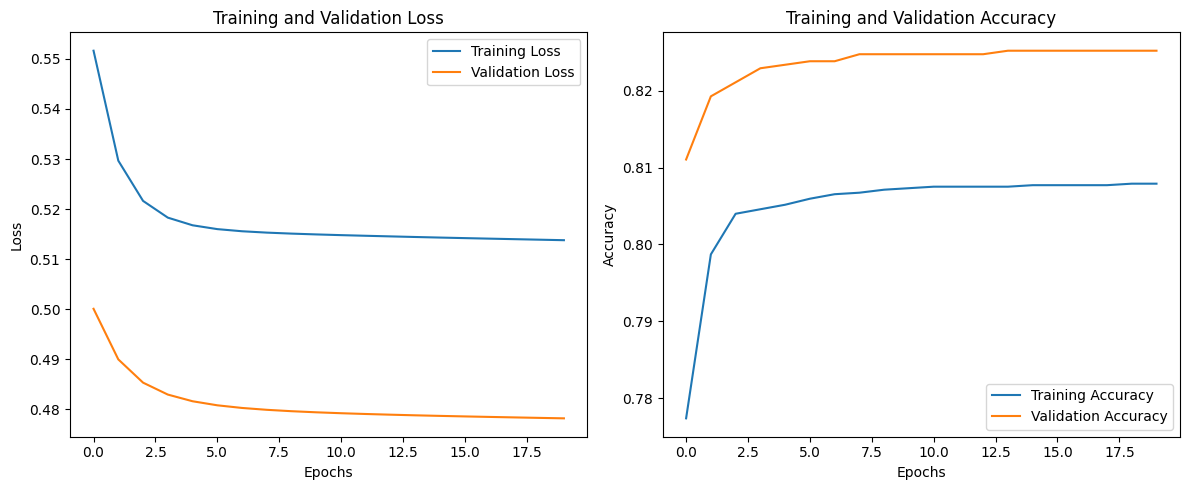

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(vali_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_score, label='Training Accuracy')
plt.plot(val_score, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()